<a href="https://colab.research.google.com/github/LTPDat/AI/blob/main/W7_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical #Để chuyển thành one hot encoding
from keras.models import load_model
from keras.utils import load_img

#MNIST

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
train_images.shape

(60000, 28, 28)

So nay la:  5


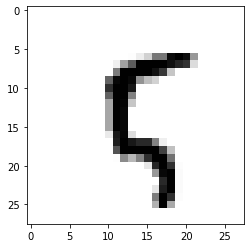

In [4]:
hinh = train_images[100]
plt.imshow(hinh, cmap = plt.cm.binary)
plt.show
print("So nay la: ", train_labels[100])

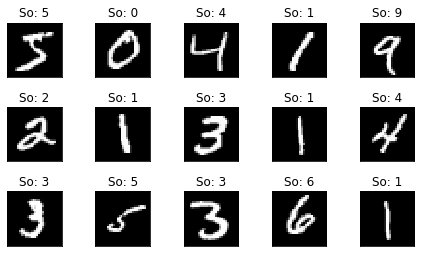

In [5]:
for i in range(15):
  plt.subplot(3,5,i+1)
  plt.tight_layout()
  plt.imshow(train_images[i], cmap='gray', interpolation='none')
  plt.title('So: {}'.format(train_labels[i]))
  plt.xticks([])
  plt.yticks([])

In [6]:
model = Sequential()
model.add(Dense(512,input_shape = (784,), activation='relu', name="Layer_1"))
model.add(Dense(10,activation='softmax', name = "Output_layer"))
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Layer_1 (Dense)             (None, 512)               401920    
                                                                 
 Output_layer (Dense)        (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
None


In [7]:
train_images = train_images.reshape((60000,28*28)) #Chuyển về input 1 chiều
train_images = train_images.astype('float32')/255 #Ảnh có giá trị 0-->255, Scale xuống thành 0-->1
test_images =  test_images.reshape((10000,28*28)) #Chuyển về input 1 chiều
test_images = test_images.astype('float32')/255
train_images.shape

(60000, 784)

In [8]:
train_labels = to_categorical(train_labels, 10) #One hot encoding
test_labels = to_categorical(test_labels, 10)
print(train_labels.shape)
print(test_labels.shape)

(60000, 10)
(10000, 10)


In [9]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=10, batch_size=128)#, validation_split = 0.1)

Epoch 1/10
469/469 [==============================] - 11s 19ms/step - loss: 0.2662 - accuracy: 0.9227
Epoch 2/10
469/469 [==============================] - 7s 16ms/step - loss: 0.1089 - accuracy: 0.9677
Epoch 3/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0710 - accuracy: 0.9791
Epoch 4/10
469/469 [==============================] - 6s 12ms/step - loss: 0.0508 - accuracy: 0.9848
Epoch 5/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0388 - accuracy: 0.9886
Epoch 6/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0289 - accuracy: 0.9917
Epoch 7/10
469/469 [==============================] - 6s 12ms/step - loss: 0.0213 - accuracy: 0.9944
Epoch 8/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0169 - accuracy: 0.9954
Epoch 9/10
469/469 [==============================] - 6s 12ms/step - loss: 0.0128 - accuracy: 0.9969
Epoch 10/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0092 - accur

In [10]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("test_accuracy",test_acc)
print("test_loss", test_loss)

313/313 [==============================] - 1s 3ms/step - loss: 0.0740 - accuracy: 0.9795
test_accuracy 0.9794999957084656
test_loss 0.07400748878717422


In [11]:
model.save('model1.h5')
model11 = load_model('model1.h5')